<h1> Principal Component Analysis</h1>

<h2> Imporing data and packages </h2>

Importing essential libraries

In [9]:
import pandas as pd
import numpy as np
import os
import warnings
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.model_selection import train_test_split

Suppressing warning messages

In [2]:
warnings.filterwarnings('ignore')

Setting file paths

In [3]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # setting path to parent directory
scripts_dir = os.path.join(parent_dir,"scripts") # setting path to scripts directory
data_path = os.path.join(parent_dir,"data","teleco_aggr_data.csv") # setting path to data directory
data_path_2 = os.path.join(parent_dir,"data","teleco_clean_data.csv") # setting path to data directory
data_path_3 = os.path.join(parent_dir,"data","teleco_outlier_free_data.csv") # setting path to data directory

sys.path.insert(1, scripts_dir)

Importing data cleaning and summarizing scripts

In [4]:
from data_cleaning_functions import DataCleaner as Cleaner 
from data_summarizing_functions import DataSummarizer as Sumar

cleaner = Cleaner()
sumar = Sumar()

loading the dataframes

In [5]:
aggr_df= pd.read_csv(data_path)
df3= pd.read_csv(data_path_2)
outlier_free_df= pd.read_csv(data_path_3)

In [6]:
outlier_free_df.head()

,MSISDN/Number,xDr_session_count,session_dur,Total_DL,Total_UL,total_vol,youtube,netflix,google,gaming,email,social,other,Decile
0,"33,601,001,722.00",1,116720.0,842.637466,36.053108,878.690574,21.624548,27.180981,4.389005,812.458661,1.331362,2.232135,386.570872,5
1,"33,601,001,754.00",1,181230.0,120.755184,36.104459,156.859643,12.432223,11.221763,5.334863,119.750078,3.307781,2.660565,281.710071,8
2,"33,601,002,511.00",1,134969.0,556.659663,39.306820,595.966483,21.333570,19.353900,3.443126,538.827713,3.205380,3.195623,501.693672,6
3,"33,601,007,832.00",1,49878.0,401.993172,20.327526,422.320698,6.977321,1.942092,9.678493,391.126127,2.284670,0.280294,35.279702,2
4,"33,601,008,617.00",2,37104.0,1363.130417,94.280527,1457.410944,41.533002,49.201724,18.499616,1314.797820,3.305469,2.912542,804.804484,1


In [7]:
outlier_free_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98804 entries, 0 to 98803
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSISDN/Number      98804 non-null  object 
 1   xDr_session_count  98804 non-null  int64  
 2   session_dur        98804 non-null  float64
 3   Total_DL           98804 non-null  float64
 4   Total_UL           98804 non-null  float64
 5   total_vol          98804 non-null  float64
 6   youtube            98804 non-null  float64
 7   netflix            98804 non-null  float64
 8   google             98804 non-null  float64
 9   gaming             98804 non-null  float64
 10  email              98804 non-null  float64
 11  social             98804 non-null  float64
 12  other              98804 non-null  float64
 13  Decile             98804 non-null  int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 10.6+ MB


In [12]:
from sklearn.preprocessing import StandardScaler
features = ['session_dur', 'Total_DL', 'Total_UL', 'total_vol', 'youtube', 'netflix', 'google', 'gaming','email','social']
relevant_data = outlier_free_df[features]
x = relevant_data.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [14]:
x.shape

(98804, 10)

In [15]:
np.mean(x), np.std(x)

(-1.2498717407706713e-16, 1.0)

In [16]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [26]:
normalised_df = pd.DataFrame(x,columns=features)
normalised_df.tail()

,session_dur,Total_DL,Total_UL,total_vol,youtube,netflix,google,gaming,email,social
98799,0.654469,-1.103799,-0.711660,-1.108207,-0.017641,0.118182,0.010915,-1.154064,0.329851,-0.593132
98800,1.363581,1.247617,0.762286,1.249807,0.606073,1.484922,0.073354,1.217476,1.473482,1.295538
98801,-1.499383,0.318079,-1.006343,0.238982,-0.118252,-0.861446,-0.406108,0.334066,-1.094499,-1.334227
98802,0.377900,-0.355272,-0.644887,-0.384278,-0.551400,-1.264975,-0.777211,-0.298393,-0.196160,-1.202153
98803,1.969198,-0.092241,0.193848,-0.075804,0.524631,0.152049,-0.000080,-0.091292,0.283345,-1.186843


In [22]:
from sklearn.decomposition import PCA
pca_df = PCA(n_components=4)
principalComponents_df = pca_df.fit_transform(x)

In [24]:
principal_Df = pd.DataFrame(data = principalComponents_df
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
principal_Df.tail()

,principal component 1,principal component 2,principal component 3,principal component 4
98799,-1.353100,1.451061,-0.645917,-0.453847
98800,3.335934,-0.036641,-0.719559,0.542185
98801,-1.455855,-1.868885,0.829416,-0.728753
98802,-1.720152,-0.542993,-0.906929,-0.481539
98803,0.347520,0.565022,-1.882699,-1.270784


In [25]:
print('Explained variation per principal component: {}'.format(pca_df.explained_variance_ratio_))

Explained variation per principal component: [0.57276675 0.13194174 0.07775458 0.05879814]


From the above output, you can observe that the principal component 1 holds 57.2% of the information while the principal component 2 holds only 13% of the information. Also, the other point to note is about 30% information was lost.

<Figure size 432x288 with 0 Axes>

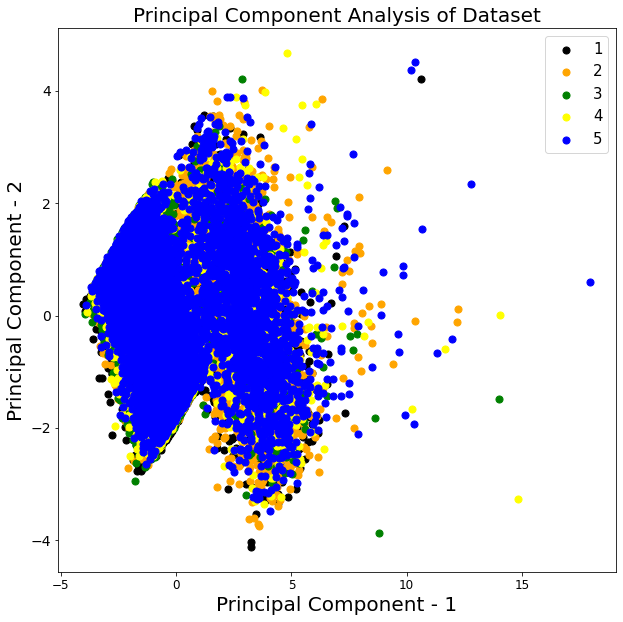

In [34]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Dataset",fontsize=20)
targets = [1, 2, 3, 4, 5]
colors = ['black', 'orange', 'green', 'yellow', 'blue']
for target, color in zip(targets,colors):
    indicesToKeep = outlier_free_df['Decile'] == target
    plt.scatter(principal_Df.loc[indicesToKeep, 'principal component 1']
               , principal_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

The above result shows the top 5 session duration decile groups are not linearly separable. 